In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
print(os.listdir(r"C:\Users\e870859\Desktop\Data Science\7. Deep Learning Compititions\Tutorial -20 Covid X- Ray"))

['.ipynb_checkpoints', 'Untitled-Copy1.ipynb', 'Untitled.ipynb', 'xray_dataset_covid19']


In [21]:
import cv2
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [22]:
Pneumonia_data = os.listdir(r'C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -20 Covid X- Ray/xray_dataset_covid19/train/PNEUMONIA/')
print(Pneumonia_data[:10]) #the output we get are the .png files

Normal_data = os.listdir(r'C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -20 Covid X- Ray/xray_dataset_covid19/train/NORMAL/')
print('\n')
print(Normal_data[:10])

['01E392EE-69F9-4E33-BFCE-E5C968654078.jpeg', '1-s2.0-S0140673620303706-fx1_lrg.jpg', '1-s2.0-S1684118220300608-main.pdf-001.jpg', '1-s2.0-S1684118220300608-main.pdf-002.jpg', '1-s2.0-S1684118220300682-main.pdf-002-a1.png', '1-s2.0-S1684118220300682-main.pdf-002-a2.png', '1-s2.0-S1684118220300682-main.pdf-003-b1.png', '1-s2.0-S1684118220300682-main.pdf-003-b2.png', '1312A392-67A3-4EBF-9319-810CF6DA5EF6.jpeg', '171CB377-62FF-4B76-906C-F3787A01CB2E.jpeg']


['IM-0001-0001.jpeg', 'IM-0003-0001.jpeg', 'IM-0005-0001.jpeg', 'IM-0006-0001.jpeg', 'IM-0007-0001.jpeg', 'IM-0009-0001.jpeg', 'IM-0010-0001.jpeg', 'IM-0011-0001-0001.jpeg', 'IM-0011-0001-0002.jpeg', 'IM-0011-0001.jpeg']


## DATA VISUALIZATION

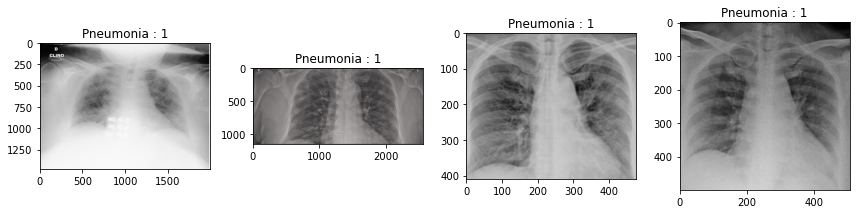

In [23]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -20 Covid X- Ray/xray_dataset_covid19/train/PNEUMONIA' + "/" + Pneumonia_data[i])
    plt.imshow(img)
    plt.title('Pneumonia : 1')
    plt.tight_layout()
plt.show()

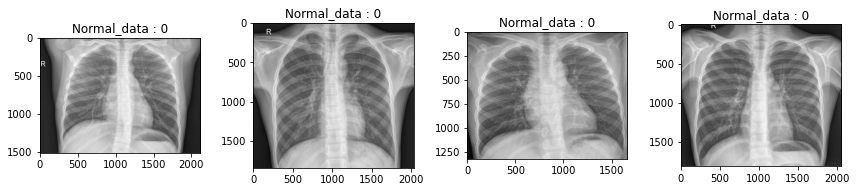

In [24]:
plt.figure(figsize = (12,12))
for i in range(4):
    plt.subplot(1, 4, i+1)
    img = cv2.imread('C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -20 Covid X- Ray/xray_dataset_covid19/train/NORMAL' + "/" + Normal_data[i+1])
    plt.imshow(img)
    plt.title('Normal_data : 0')
    plt.tight_layout()
plt.show()

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [26]:
training_dir="C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -20 Covid X- Ray/xray_dataset_covid19/train/"
training_generator=ImageDataGenerator(rescale=1/255,featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range = 30,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.2, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip = False,  # randomly flip images
        vertical_flip=False)
train_generator=training_generator.flow_from_directory(training_dir,target_size=(200,200),batch_size=4,class_mode='binary')

Found 148 images belonging to 2 classes.


In [27]:
test_dir="C:/Users/e870859/Desktop/Data Science/7. Deep Learning Compititions/Tutorial -20 Covid X- Ray/xray_dataset_covid19/test/"
test_generator=ImageDataGenerator(rescale=1/255)
test_generator=test_generator.flow_from_directory(test_dir,target_size=(200,200),batch_size=16,class_mode='binary')

Found 42 images belonging to 2 classes.


In [28]:
import tensorflow as tf

In [29]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [30]:
model=tf.keras.Sequential([
    tf.keras.layers.Conv2D(32,(3,3),input_shape=(200,200,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(128,(3,3),activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    
    tf.keras.layers.Conv2D(256,(3,3),activation='relu'), 
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256,activation='relu'),
    tf.keras.layers.Dense(1,activation='sigmoid')
    
])

In [31]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='binary_crossentropy',metrics=['acc'])

In [32]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 23, 23, 128)       0         
__________

In [33]:
history = model.fit_generator(train_generator,
            
            epochs = 30,
            
            verbose = 1)

Epoch 1/30
37/37 [==============================] - 14s 378ms/step - loss: 0.8620 - acc: 0.4865
Epoch 2/30
37/37 [==============================] - 16s 441ms/step - loss: 0.6721 - acc: 0.6149
Epoch 3/30
37/37 [==============================] - 30s 804ms/step - loss: 0.7087 - acc: 0.6554
Epoch 4/30
37/37 [==============================] - 30s 810ms/step - loss: 0.6257 - acc: 0.6757
Epoch 5/30
37/37 [==============================] - 33s 904ms/step - loss: 0.6141 - acc: 0.6892
Epoch 6/30
37/37 [==============================] - 35s 954ms/step - loss: 0.4149 - acc: 0.8176
Epoch 7/30
37/37 [==============================] - 33s 885ms/step - loss: 0.3324 - acc: 0.8514
Epoch 8/30
37/37 [==============================] - 33s 895ms/step - loss: 0.3492 - acc: 0.8378
Epoch 9/30
37/37 [==============================] - 33s 890ms/step - loss: 0.3563 - acc: 0.8446
Epoch 10/30
37/37 [==============================] - 40s 1s/step - loss: 0.3115 - acc: 0.8581
Epoch 11/30
37/37 [=======================

In [34]:
# test_accu = model.evaluate_generator(test_img_generator,steps=624 // batch_size)

In [35]:
test_dir="../input/chest-xray-pneumonia/chest_xray/test/"
test_generator=ImageDataGenerator(rescale=1/255)
test_generator=test_generator.flow_from_directory(test_dir,target_size=(200,200),batch_size=16,class_mode='binary')

FileNotFoundError: [WinError 3] The system cannot find the path specified: '../input/chest-xray-pneumonia/chest_xray/test/'

In [ ]:
print("Loss of the model is - " , model.evaluate(test_generator)[0]*100 , "%")
print("Accuracy of the model is - " , model.evaluate(test_generator)[1]*100 , "%")

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
acc = history.history['acc']
# val_acc = history.history['val_acc']
loss = history.history['loss']
# val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

In [ ]:
test_generator